In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [2]:
# read data into dataframe
df =  pd.read_csv('../input/german-credit/german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
# understand data type
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [4]:
# check for null values
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

We observe that the 'Saving accounts' and 'Checking accounts' contains null values. Let's check the content of these columns.

In [5]:
print('Content of saving accounts:', df['Saving accounts'].unique())
print('Content of checking account:', df['Checking account'].unique())

Content of saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Content of checking account: ['little' 'moderate' nan 'rich']


The null values of these 2 columns can be due to the non existent of these accounts which means the users did not open these accounts. Hence, we will replace the null values with 'none'.

In [6]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,none,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


Count Plot for Categorical Variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

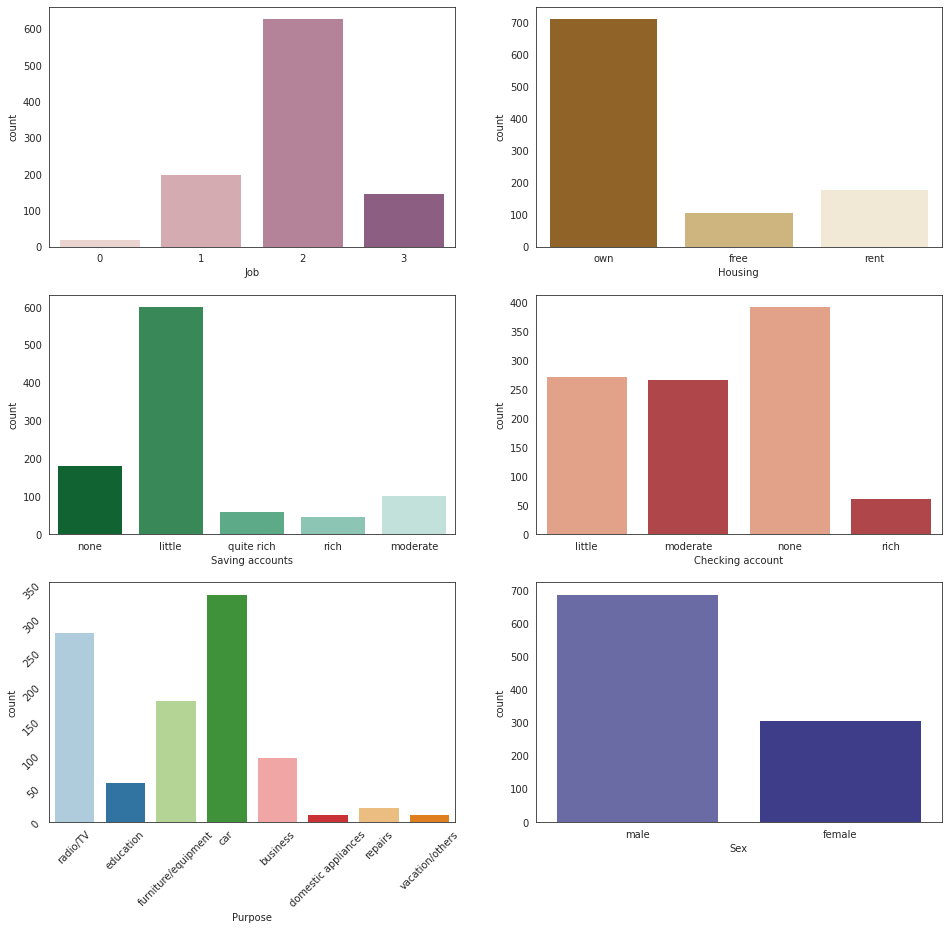

In [7]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
sns.countplot(df['Job'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(df['Housing'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(df['Saving accounts'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(df['Checking account'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(df['Purpose'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(df['Sex'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)

Line Plot for Bivariate Analysis on Age, Credit Amount and Duration

<AxesSubplot:xlabel='Duration', ylabel='Credit amount'>

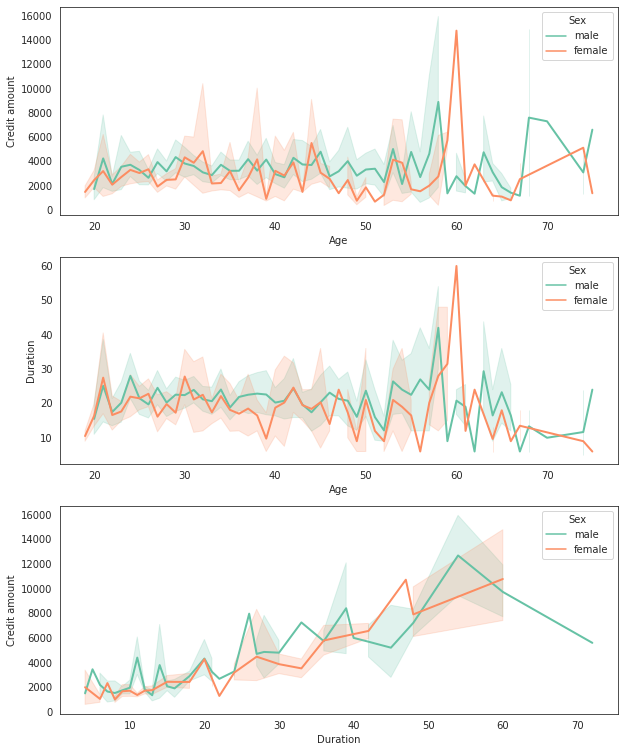

In [8]:
fig, ax = plt.subplots(3,1,figsize=(10,13))

#plt.tight_layout(4)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0], palette='Set2')
sns.lineplot(data=df, x='Age', y='Duration', hue='Sex', lw=2, ax=ax[1], palette='Set2')
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[2],  palette='Set2')

We observe that there is no significant difference in terms of duration and credit amount between male and female. However, our plot shows that there might be relationship between credit amount and duration.

<AxesSubplot:>

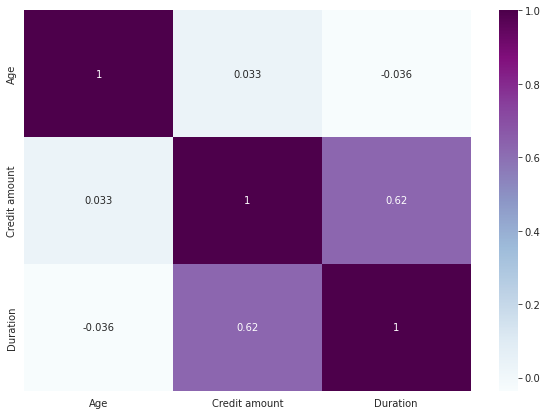

In [9]:
#We observe that there is no significant difference in terms of duration and credit amount between male and female. However, our plot shows that there might be relationship between credit amount and duration.

fig = plt.subplots(figsize=(10,7))
data = df[['Age','Credit amount', 'Duration']]
sns.heatmap(data.corr(), annot = True, cmap='BuPu')

This shows that there is some positive relationship between duration and credit amount but not for other variables.

We will be using numberical variables for clustering which are age, credit amount and duration.

In [10]:
data = df[['Age', 'Credit amount', 'Duration']]
data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<AxesSubplot:xlabel='Duration', ylabel='Density'>

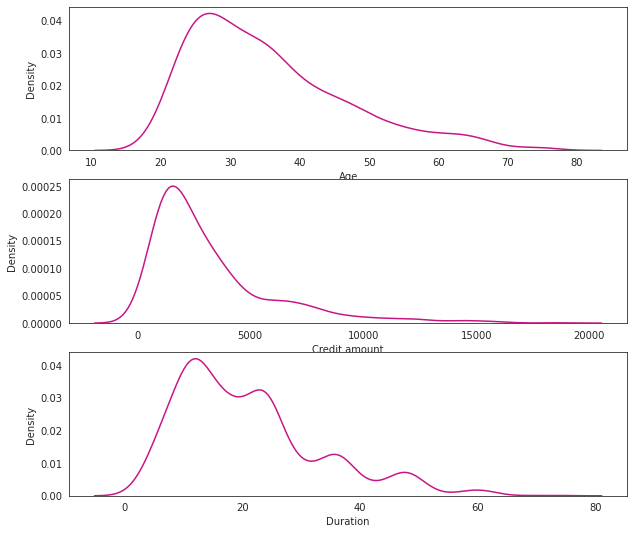

In [11]:
# Distribution of Age, Credit amount and Duration
fig, ax = plt.subplots(3,1,figsize=(10,9))
#plt.tight_layout(4)

sns.distplot(data['Age'], color='mediumvioletred', bins=80, hist=False, ax=ax[0])
sns.distplot(data['Credit amount'], color='mediumvioletred', bins=80, hist=False, ax=ax[1])
sns.distplot(data['Duration'], color='mediumvioletred', bins=80, hist=False, ax=ax[2])

It seems like our variables are highly skewed. Hence, we will perform logarithm transformation to our variables to eliminate our skewness.

In [12]:
data_log = np.log(data)
data_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<AxesSubplot:xlabel='Duration', ylabel='Density'>

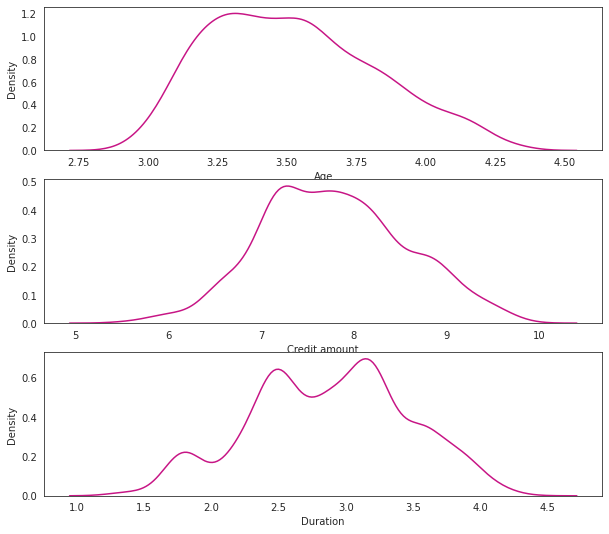

In [13]:
fig, ax = plt.subplots(3,1,figsize=(10,9))
#plt.tight_layout(4)

sns.distplot(data_log['Age'], color='mediumvioletred', bins=80, hist=False, ax=ax[0])
sns.distplot(data_log['Credit amount'], color='mediumvioletred', bins=80, hist=False, ax=ax[1])
sns.distplot(data_log['Duration'], color='mediumvioletred', bins=80, hist=False, ax=ax[2])

let's use the elbow method to determine the optimal number of clusters.

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_log)

In [15]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

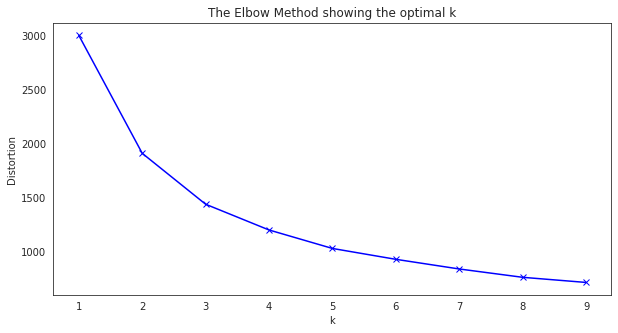

In [16]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

my number of clusters to be 4.

In [17]:
# k-means algorithm
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')

3D Scatter Plot

In [18]:
fig = px.scatter_3d(df, x='Age', y='Duration', z='Credit amount',
              color='Cluster')
fig.show()

Size of Each Clusters

In [19]:
cluster_size = df.groupby(['Cluster'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Cluster,size,Percentage
0,0,248,0.248
1,1,218,0.218
2,2,303,0.303
3,3,231,0.231


In [20]:
# Plot pie chart
fig = px.pie(cluster_size, values='Percentage', names='Cluster', 
             color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500,
            title='Size of Each Cluster')
fig.show()

Mean Value of each variables in each clusters

In [21]:
grouped = df.groupby(['Cluster'], as_index=False).mean().round(1)
grouped.drop(['Job'], axis=1, inplace=True)
grouped

,Cluster,Age,Credit amount,Duration
0,0,28.9,1366.4,10.6
1,1,38.0,7173.6,36.3
2,2,28.4,2944.7,23.1
3,3,49.8,2061.8,14.6


Distribution of Age in Each Clusters

In [22]:
cluster0 = df[df['Cluster']==0]
cluster1 = df[df['Cluster']==1]
cluster2 = df[df['Cluster']==2]
cluster3 = df[df['Cluster']==3]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

<AxesSubplot:title={'center':'Cluster 3'}, xlabel='Age', ylabel='Density'>

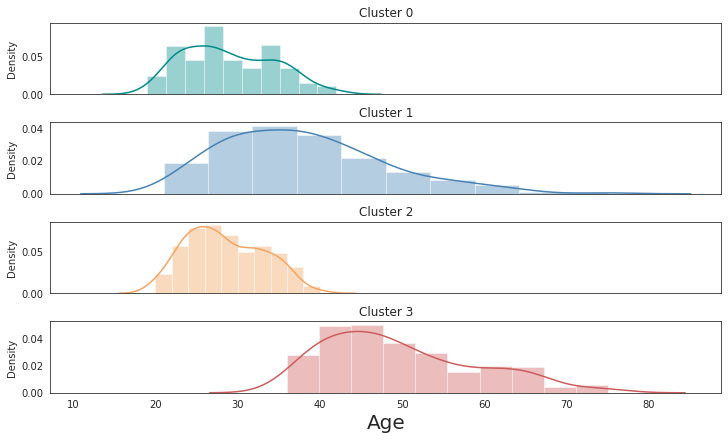

In [23]:
fig, ax = plt.subplots(4,1,figsize=(10,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('Cluster 0')
ax[1].title.set_text('Cluster 1')
ax[2].title.set_text('Cluster 2')
ax[3].title.set_text('Cluster 3')
ax[0].axes.xaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[2].axes.xaxis.set_visible(False)
plt.xlabel('Age', fontsize=20)
sns.distplot(cluster0['Age'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Age'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Age'], color='sandybrown', bins=10, ax=ax[2])
sns.distplot(cluster3['Age'], color='indianred', bins=10, ax=ax[3])

Distribution of Credit Amount in Each Clusters

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

<AxesSubplot:title={'center':'Cluster 3'}, xlabel='Credit amount', ylabel='Density'>

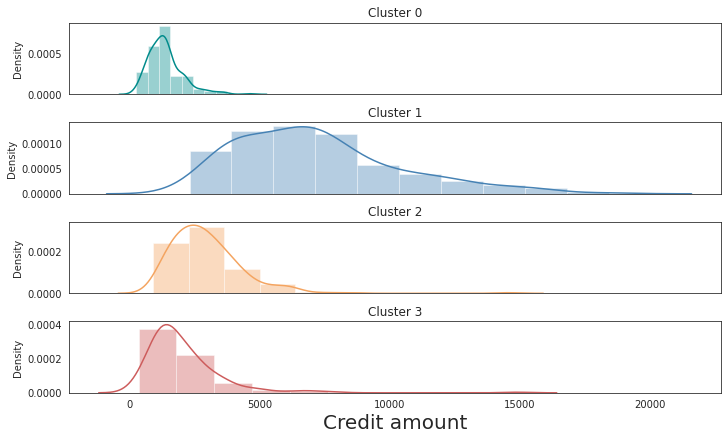

In [24]:
fig, ax = plt.subplots(4,1,figsize=(10,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('Cluster 0')
ax[1].title.set_text('Cluster 1')
ax[2].title.set_text('Cluster 2')
ax[3].title.set_text('Cluster 3')
ax[0].axes.xaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[2].axes.xaxis.set_visible(False)
plt.xlabel('Credit Amount', fontsize=20)
sns.distplot(cluster0['Credit amount'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Credit amount'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Credit amount'], color='sandybrown', bins=10, ax=ax[2])
sns.distplot(cluster3['Credit amount'], color='indianred', bins=10, ax=ax[3])

Distribution of Duration in Each Cluster

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

<AxesSubplot:title={'center':'Cluster 3'}, xlabel='Duration', ylabel='Density'>

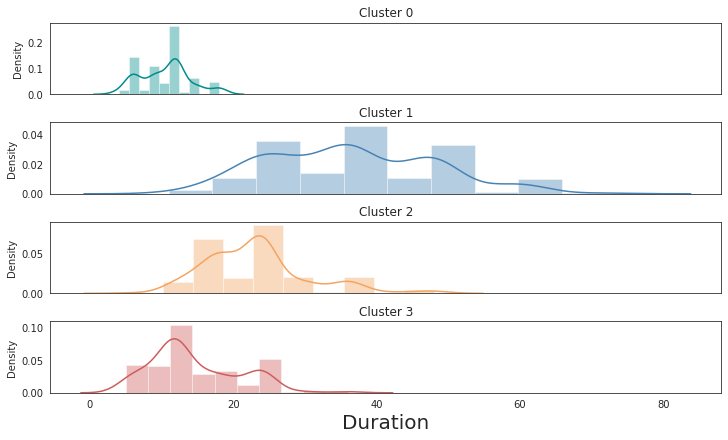

In [25]:
fig, ax = plt.subplots(4,1,figsize=(10,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('Cluster 0')
ax[1].title.set_text('Cluster 1')
ax[2].title.set_text('Cluster 2')
ax[3].title.set_text('Cluster 3')
ax[0].axes.xaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[2].axes.xaxis.set_visible(False)
plt.xlabel('Duration', fontsize=20)
sns.distplot(cluster0['Duration'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Duration'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Duration'], color='sandybrown', bins=10, ax=ax[2])
sns.distplot(cluster3['Duration'], color='indianred', bins=10, ax=ax[3])

Job

In [26]:
def get_df(data):
    out = data.value_counts(normalize=True).reset_index()
    return(out)

In [27]:
def plot(x):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=get_df(cluster0[x])['index'],
        y=get_df(cluster0[x])[x],
        name='Cluster 0',
        marker_color='mediumaquamarine'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster1[x])['index'],
        y=get_df(cluster1[x])[x],
        name='Cluster 1',
        marker_color='steelblue'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster2[x])['index'],
        y=get_df(cluster2[x])[x],
        name='Cluster 2',
        marker_color='sandybrown'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster3[x])['index'],
        y=get_df(cluster3[x])[x],
        name='Cluster 3',
        marker_color='indianred'
    ))

    fig.update_layout(barmode='group', xaxis_tickangle=45, title=x)
    fig.show()

In [28]:
plot('Job')

Description on numeric values: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

Cluster 0 has a significantly low amount of customers are hired for highly highly skilled job compare to other clusters.

Cluster 1 contains a relatively high number of customers are hired for highly skilled job.

Cluster 2 has a higher percentage of customers who are hired for skilled job.

Cluster 3 containes a slightly higher percentage of customers are resident and are hired for unskilled job.

Housing

In [29]:
plot('Housing')

Majority of our customers stay in their own house.

Cluster 0 contains a relatively small percentage of customers staying in free housing.

Cluster 1 contains a higher number of customers stay in free housing compare to other clusters.

Cluster 1 and cluster 2 have a similar amount of customers staying in rent house.

For cluster 3, the percentage of customers staying in a rent house ond free house is approximately the same

Saving Account

In [30]:
plot('Saving accounts')

we can see that Cluster 1 has the highest percentage of customers who do not have a saving account.

Cheking Account

In [31]:
plot('Checking account')

Many customers do not have a checking account.

Cluster 1 has most of its cheking account labelled moderate and least checking account labelled rich.

Cluster 3 contains the most customers with no checking account. Cluster 3 also has a relatively high percentage of customers with a checking account labelled rich and a significantly low percentage checking account labelled moderate.

Purpose

In [32]:
plot('Purpose')

Majority of the customers in cluster 0 use credit card for the purpose of purchasing radio/TV. Also, cluster 0 contains a higher percentage of customer who use it for domestic appliances compare to other clusters.

For cluster 1, a significantly low number of cutomers use it to purchase radio/TV but this cluster contains the most customers who use credit card for business and vacation purposes. In this cluster, customers mainly use the credit card for the purpose for buying car.

Cluster 2 contains the most customers who use credit card to buy furniture/equipment.

Cluster 3 contains the most customers who use credit card for paying education fee and customers in this cluster mainly use the credit card for the purpose for buying car.

Conclusion : 

Cluster 0:

Young age, small credit amount and short duration
Customers mainly with saving account labelled little
Purpose of using credit card is mainly for puchasing radio/TV
Cluster 1:

Middle age, large credit amount and long duration
High number of customers are hired for highly skilled job
Up to 25% of the customers do not have a saving account
Purpose of using credit card is mainly for puchasing car
Cluster 2:

Young age, large credit amount and long duration
Up to 70% of customers are hired for skilled job
Purpose of using credit card is mainly for puchasing radio/TV, car and furniture/equipment
Cluster 3:

Old age, small credit amount and short duration
Up to 30% of the customers are resident and are hired for unskilled job
Up to 45% of the customers do not have a checking account
Purpose of using credit card is mainly for puchasing car